In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

Exercise 1

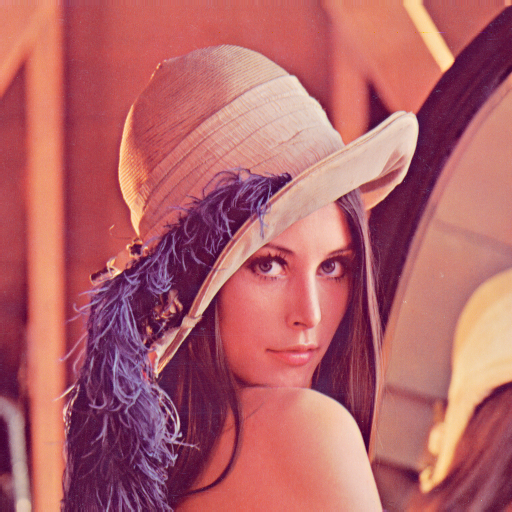

In [ ]:
image= Image.open("/content/lenna_image.png")
image

(-0.5, 99.5, 99.5, -0.5)

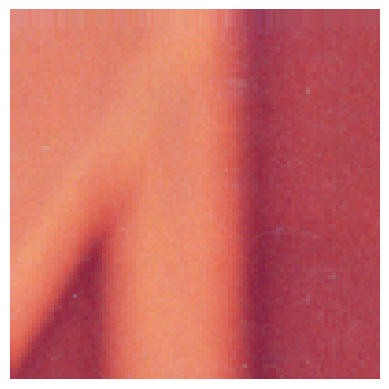

In [ ]:
image_array= np.array(image)
top_left_corner = image_array[:100, :100]
plt.imshow(top_left_corner)
plt.axis("off")

Text(0.5, 1.0, 'Red')

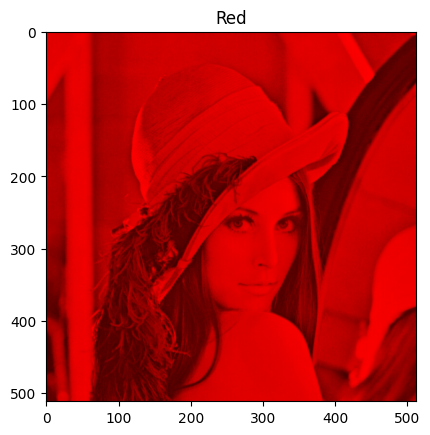

In [ ]:
red= image_array.copy()
red[:,:,1]=0
red[:,:,2]=0
plt.imshow(red)
plt.title("Red")

Text(0.5, 1.0, 'Green')

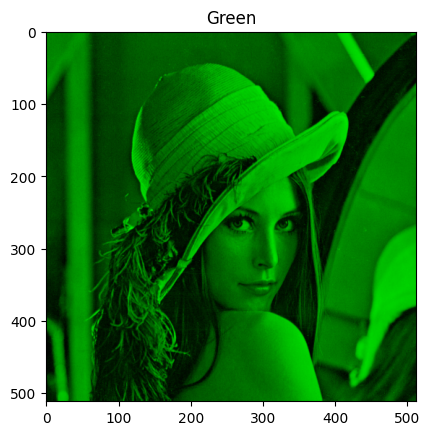

In [ ]:
green= image_array.copy()
green[:,:,0]=0
green[:,:,2]=0
plt.imshow(green)
plt.title("Green")

Text(0.5, 1.0, 'Blue')

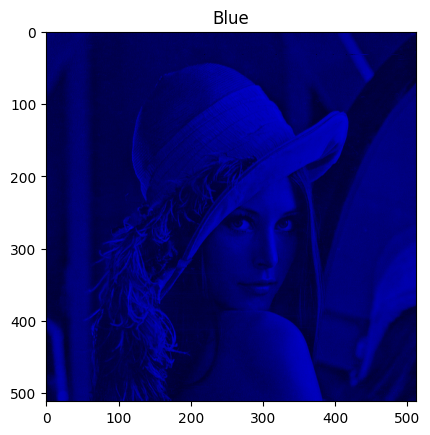

In [ ]:
blue= image_array.copy()
blue[:,:,0]=0
blue[:,:,1]=0
plt.imshow(blue)
plt.title("Blue")

Text(0.5, 1.0, 'modified')

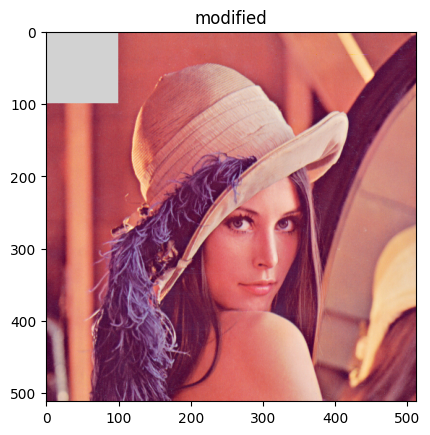

In [ ]:
modified= image_array.copy()
modified[:100,:100,1]=210
modified[:100,:100,0]=210
modified[:100,:100,2]=210
plt.imshow(modified)
plt.title("modified")

Exercise 2

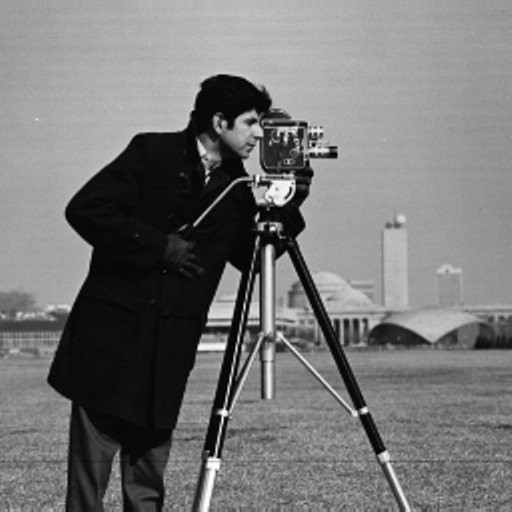

In [ ]:
image_2= Image.open("/content/cameraman.png")
image_2

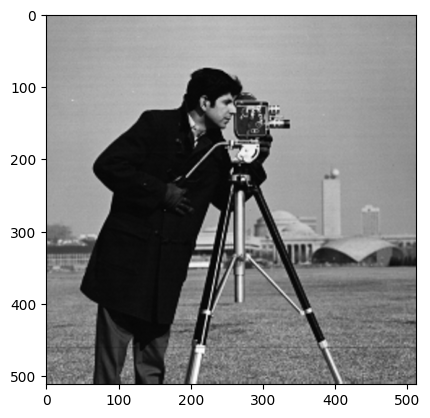

In [ ]:
image_gray= image_2.convert('L')
plt.imshow(image_gray, cmap='gray')

In [ ]:
image_gray_array= np.array(image_gray)
height, width = image_gray_array.shape[:2]
height, width

(512, 512)

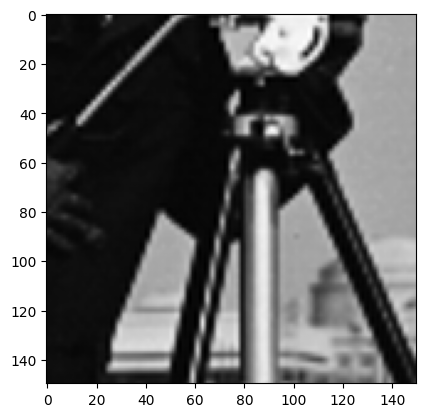

In [ ]:
start_y = (height - 150) // 2
end_y = start_y + 150
start_x = (width - 150) // 2
end_x = start_x + 150
middle_section = image_gray_array[start_y:end_y, start_x:end_x]
plt.imshow(middle_section, cmap='gray')

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
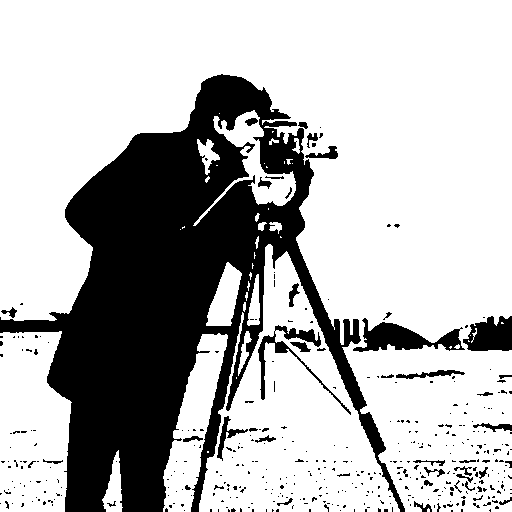

In [ ]:
binary_image = np.where(image_gray_array < 100, 0, 255).astype(np.uint8)
binary_image

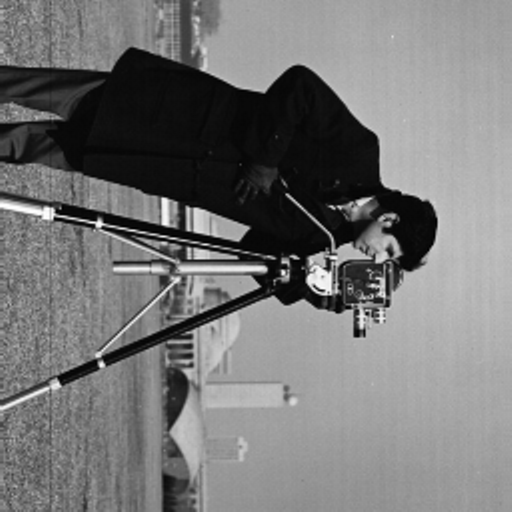

In [ ]:
rotate_image= image_gray.rotate(-90)
rotate_image

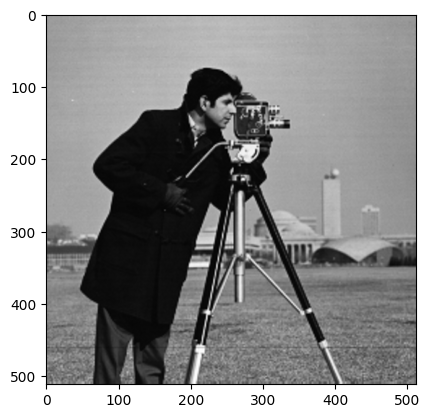

In [ ]:
image_rgb = image_gray.convert('RGB')
plt.imshow(image_rgb)

Exercise 3

In [ ]:
print(image_gray_array.shape)
height, width = image_gray_array.shape
data = image_gray_array.copy()

(512, 512)


In [ ]:
mean = np.mean( data , axis =0)
centered_data = data - mean
centered_data = centered_data
centered_data.shape

(512, 512)

In [ ]:
cov_matrix = np.cov(centered_data, rowvar=False)
cov_matrix.shape

(512, 512)

In [ ]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

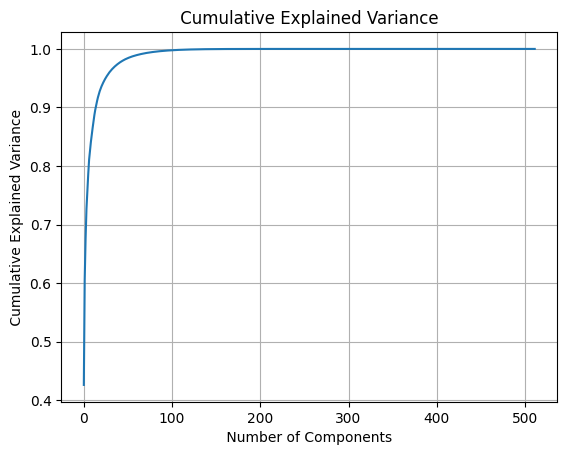

In [ ]:
explained_variance_ratio = eigenvalues / np .sum ( eigenvalues )
plt.plot ( np . cumsum ( explained_variance_ratio ) )
plt.title (" Cumulative Explained Variance ")
plt.xlabel (" Number of Components ")
plt.ylabel (" Cumulative Explained Variance ")
plt.grid ( True )
plt.show ()

In [ ]:
# Choose four different k values (low, medium, high compression)
k_values = [10, 30, 60, 100]  # Adjust based on cumulative variance plot

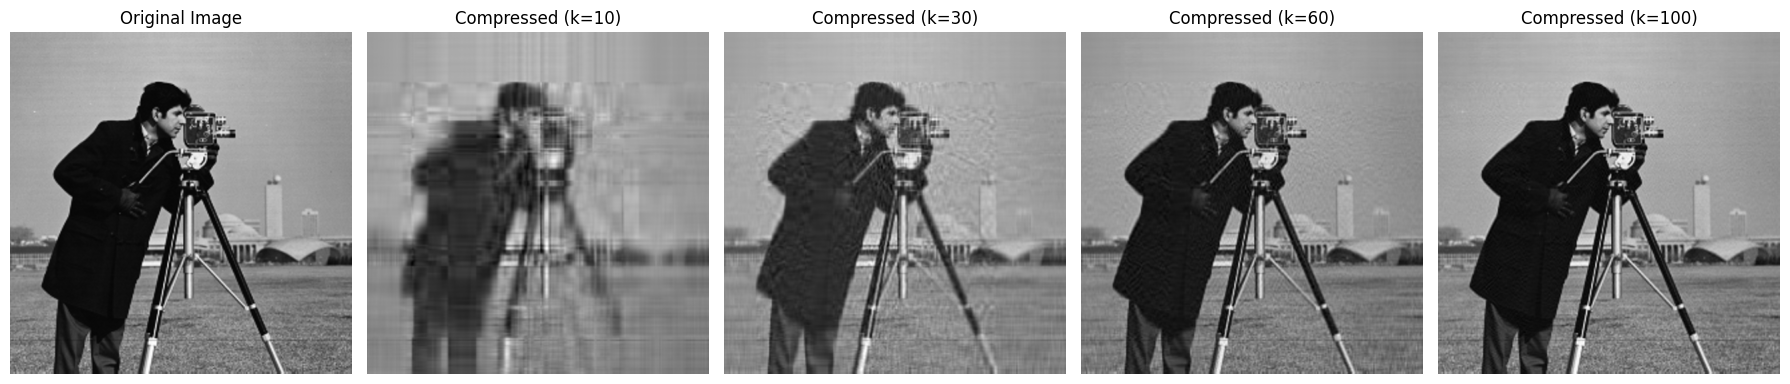

In [ ]:
# Initialize figure for comparison
fig, axes = plt.subplots(1, 5, figsize=(18, 6))

# Display original image
axes[0].imshow(image_gray_array, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

# Process each k value and display results
for i, k in enumerate(k_values):
    components = eigenvectors[:, :k]

    # Compress and decompress image
    compressed_data = np.dot(centered_data, components)
    decompressed_data = np.dot(compressed_data, components.T) + mean

    # Display decompressed image
    axes[i+1].imshow(decompressed_data, cmap="gray")
    axes[i+1].set_title(f"Compressed (k={k})")
    axes[i+1].axis("off")

plt.tight_layout()
plt.show()

#Worksheet 3

In [ ]:
import numpy as np

In [ ]:
def softmax(z):

    # Numerical stability: Subtract max value per row to prevent large exponentials
    z_stable = z - np.max(z, axis=1, keepdims=True)

    # Compute softmax probabilities
    exp_z = np.exp(z_stable)
    softmax_probs = exp_z / np.sum(exp_z, axis=1, keepdims=True)

    return softmax_probs

In [ ]:
# Softmax Test Case
z_test = np.array([[2.0, 1.0, 0.1], [1.0, 1.0, 1.0]])
softmax_output = softmax(z_test)

In [ ]:
# Verify if the sum of probabilities for each row is 1
row_sums = np.sum(softmax_output, axis=1)
assert np.allclose(row_sums, 1), f"Test failed: Row sums are {row_sums}"
print("Softmax function passed the test case!")

Softmax function passed the test case!


In [ ]:
def predict_softmax(X, W, b):

    # Compute logits: Z = XW + b
    logits = np.dot(X, W) + b

    # Get softmax probabilities
    probabilities = softmax(logits)

    # Predict the class with the highest probability
    predicted_classes = np.argmax(probabilities, axis=1)

    return predicted_classes

In [ ]:
# Prediction Test Case
X_test = np.array([[0.2, 0.8], [0.5, 0.5], [0.9, 0.1]])  # Feature matrix (3 samples, 2 features)
W_test = np.array([[0.4, 0.2, 0.1], [0.3, 0.7, 0.5]])   # Weights (2 features, 3 classes)
b_test = np.array([0.1, 0.2, 0.3])                      # Bias (3 classes)

In [ ]:
# Run prediction
y_pred_test = predict_softmax(X_test, W_test, b_test)

In [ ]:
# Validate output shape
assert y_pred_test.shape == (3,), f"Test failed: Expected shape (3,), got {y_pred_test.shape}"

In [ ]:
# Print the predicted labels
print("Predicted class labels:", y_pred_test)

Predicted class labels: [1 1 0]


In [ ]:
import numpy as np

def cross_entropy_loss(y_true, y_pred):

    # Avoid log(0) by adding a small epsilon
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1.0 - epsilon)

    # Compute cross-entropy loss
    loss = -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]

    return loss

# Test Case for Loss Function
y_true_test = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # True labels (one-hot encoded)
y_pred_test = np.array([[0.7, 0.2, 0.1], [0.1, 0.8, 0.1], [0.2, 0.3, 0.5]])  # Softmax predictions

# Compute loss
loss_test = cross_entropy_loss(y_true_test, y_pred_test)

# Expected output: Loss should be a positive scalar value
assert loss_test > 0, f"Test failed: Loss should be positive, got {loss_test}"
print("Cross-entropy loss function passed the test case!")


Cross-entropy loss function passed the test case!


In [ ]:
import numpy as np

def loss_softmax(y_pred, y):

    epsilon = 1e-12  # Avoid log(0) issues
    y_pred = np.clip(y_pred, epsilon, 1.0 - epsilon)

    # Compute cross-entropy loss
    loss = -np.sum(y * np.log(y_pred))

    return loss

# Test case for Loss Function
y_true_correct = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # One-hot labels
y_pred_correct = np.array([[0.9, 0.05, 0.05],
                            [0.1, 0.85, 0.05],
                            [0.05, 0.1, 0.85]])  # Confident correct predictions

y_pred_incorrect = np.array([[0.05, 0.05, 0.9],  # Wrong predictions
                              [0.1, 0.05, 0.85],
                              [0.85, 0.1, 0.05]])

# Compute losses
loss_correct = np.mean([loss_softmax(y_pred_correct[i], y_true_correct[i]) for i in range(3)])
loss_incorrect = np.mean([loss_softmax(y_pred_incorrect[i], y_true_correct[i]) for i in range(3)])

assert loss_correct < loss_incorrect, f"Test failed: Expected loss_correct < loss_incorrect, but got {loss_correct:.4f} >= {loss_incorrect:.4f}"

print(f"Cross-Entropy Loss (Correct Predictions): {loss_correct:.4f}")
print(f"Cross-Entropy Loss (Incorrect Predictions): {loss_incorrect:.4f}")


Cross-Entropy Loss (Correct Predictions): 0.1435
Cross-Entropy Loss (Incorrect Predictions): 2.9957


In [ ]:
def softmax(logits):

    exp_logits = np.exp(logits - np.max(logits, axis=1, keepdims=True))  # For numerical stability
    return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

def cost_softmax(X, y, W, b):

    n = X.shape[0]
    logits = np.dot(X, W) + b  # Compute scores
    y_pred = softmax(logits)  # Apply softmax activation
    total_loss = np.sum(-y * np.log(y_pred + 1e-12))  # Compute total loss

    return total_loss / n  # Return average loss

# Test case for Cost Function
X_correct = np.array([[1.0, 0.0], [0.0, 1.0]])  # Feature matrix for correct predictions
y_correct = np.array([[1, 0], [0, 1]])  # True labels
W_correct = np.array([[5.0, -2.0], [-3.0, 5.0]])  # Weights
b_correct = np.array([0.1, 0.1])  # Bias

X_incorrect = np.array([[0.1, 0.9], [0.8, 0.2]])  # Feature matrix for incorrect predictions
y_incorrect = np.array([[1, 0], [0, 1]])  # True labels
W_incorrect = np.array([[0.1, 2.0], [1.5, 0.3]])  # Weights
b_incorrect = np.array([0.5, 0.6])  # Bias

# Compute costs
cost_correct = cost_softmax(X_correct, y_correct, W_correct, b_correct)
cost_incorrect = cost_softmax(X_incorrect, y_incorrect, W_incorrect, b_incorrect)

assert cost_incorrect > cost_correct, f"Test failed: Incorrect cost {cost_incorrect} is not greater than correct cost {cost_correct}"

print("Cost for correct prediction:", cost_correct)
print("Cost for incorrect prediction:", cost_incorrect)
print("Test passed!")


Cost for correct prediction: 0.0006234364123343308
Cost for incorrect prediction: 0.29930861359310845
Test passed!


In [ ]:
def gradient_descent(X, y, W, b, alpha, num_iterations):

    n = X.shape[0]

    for i in range(num_iterations):
        logits = np.dot(X, W) + b
        y_pred = softmax(logits)

        # Compute gradients
        dW = - (1 / n) * np.dot(X.T, (y - y_pred))  # Gradient for W
        db = - (1 / n) * np.sum(y - y_pred, axis=0)  # Gradient for b

        # Update parameters
        W -= alpha * dW
        b -= alpha * db

        # Print cost every 100 iterations
        if i % 100 == 0:
            cost = cost_softmax(X, y, W, b)
            print(f"Iteration {i}, Cost: {cost:.4f}")

    return W, b

# Example Run
np.random.seed(42)
X_train = np.random.rand(5, 3)  # 5 samples, 3 features
y_train = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0], [0, 1, 0]])  # One-hot labels
W_init = np.random.rand(3, 3)  # Random weights
b_init = np.random.rand(3)  # Random biases
alpha = 0.1
num_iterations = 500

W_final, b_final = gradient_descent(X_train, y_train, W_init, b_init, alpha, num_iterations)

print("Final Weights:\n", W_final)
print("Final Biases:\n", b_final)


Iteration 0, Cost: 1.0999
Iteration 100, Cost: 0.6487
Iteration 200, Cost: 0.4777
Iteration 300, Cost: 0.3863
Iteration 400, Cost: 0.3293
Final Weights:
 [[ 0.7928263   2.20563134 -1.98605446]
 [ 0.28125087 -0.96677582  2.020552  ]
 [ 2.95962099 -2.50865665  0.34703601]]
Final Biases:
 [-0.48497015  1.75910428  0.1667856 ]


In [ ]:
import numpy as np

def softmax(z):
    """Softmax function to compute probabilities"""
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # To avoid overflow
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def compute_gradient_softmax(X, y, W, b):
    """
    Compute the gradients of the cost function with respect to weights and biases.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d).
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
    tuple: Gradients with respect to weights (d, c) and biases (c,).
    """
    # Compute the logits (z) and predictions (y_pred)
    z = np.dot(X, W) + b
    y_pred = softmax(z)

    # Compute gradients
    grad_W = np.dot(X.T, (y_pred - y)) / X.shape[0]
    grad_b = np.sum(y_pred - y, axis=0) / X.shape[0]

    return grad_W, grad_b


In [ ]:
def compute_cost(X, y, W, b):
    """Compute the cost function for softmax regression"""
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    # Compute the cross-entropy cost
    cost = -np.sum(y * np.log(y_pred)) / X.shape[0]
    return cost

def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):

    cost_history = []

    for i in range(n_iter):
        # Compute gradients
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)

        # Update weights and biases using gradient descent
        W -= alpha * grad_W
        b -= alpha * grad_b

        # Optionally, compute and store the cost history
        if show_cost and i % 100 == 0:  # Show cost every 100 iterations
            cost = compute_cost(X, y, W, b)
            cost_history.append(cost)
            print(f"Iteration {i}, Cost: {cost}")

    return W, b, cost_history


In [ ]:
import numpy as np

# Define a simple feature matrix and true labels
X_test = np.array([[0.2, 0.8], [0.5, 0.5], [0.9, 0.1]])  # Feature matrix (3 samples, 2 features)
y_test = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # True labels (one-hot encoded, 3 classes)

# Define weight matrix and bias vector
W_test = np.array([[0.4, 0.2, 0.1], [0.3, 0.7, 0.5]])  # Weights (2 features, 3 classes)
b_test = np.array([0.1, 0.2, 0.3])  # Bias (3 classes)

# Compute the gradients using the function
grad_W, grad_b = compute_gradient_softmax(X_test, y_test, W_test, b_test)

# Manually compute the predicted probabilities (using softmax function)
z_test = np.dot(X_test, W_test) + b_test
y_pred_test = softmax(z_test)

# Compute the manually computed gradients
grad_W_manual = np.dot(X_test.T, (y_pred_test - y_test)) / X_test.shape[0]
grad_b_manual = np.sum(y_pred_test - y_test, axis=0) / X_test.shape[0]

# Assert that the gradients computed by the function match the manually computed gradients
assert np.allclose(grad_W, grad_W_manual), f"Test failed: Gradients w.r.t. W are not equal.\nExpected: {grad_W_manual}\nGot: {grad_W}"
assert np.allclose(grad_b, grad_b_manual), f"Test failed: Gradients w.r.t. b are not equal.\nExpected: {grad_b_manual}\nGot: {grad_b}"

# Print the gradients for verification
print("Gradient w.r.t. W:", grad_W)
print("Gradient w.r.t. b:", grad_b)
print("Test passed!")


Gradient w.r.t. W: [[ 0.1031051   0.01805685 -0.12116196]
 [-0.13600547  0.00679023  0.12921524]]
Gradient w.r.t. b: [-0.03290036  0.02484708  0.00805328]
Test passed!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def load_and_prepare_mnist(csv_file, test_size=0.2, random_state=42):
    """
    Reads the MNIST CSV file, splits data into train/test sets, and plots one image per class.

    Arguments:
    csv_file (str): Path to the CSV file containing MNIST data.
    test_size (float): Proportion of the data to use as the test set (default: 0.2).
    random_state (int): Random seed for reproducibility (default: 42).

    Returns:
    X_train, X_test, y_train, y_test: Split dataset.
    """
    # Load dataset
    csv_file = 'mnist_dataset.csv'  # Replace with your correct MNIST CSV file path



    # Separate labels and features
    y = df.iloc[:, 0].values  # First column is the label
    X = df.iloc[:, 1:].values  # Remaining columns are pixel values

    # Normalize pixel values (optional but recommended)
    X = X / 255.0  # Scale values between 0 and 1

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Plot one sample image per class
    plot_sample_images(X, y)

    return X_train, X_test, y_train, y_test

def plot_sample_images(X, y):
    """
    Plots one sample image for each digit class (0-9).

    Arguments:
    X (np.ndarray): Feature matrix containing pixel values.
    y (np.ndarray): Labels corresponding to images.
    """
    plt.figure(figsize=(10, 4))

    # Get unique class labels (digits 0-9)
    unique_classes = np.unique(y)  # Get unique class labels

    for i, digit in enumerate(unique_classes):
        index = np.where(y == digit)[0][0]  # Find first occurrence of the class
        image = X[index].reshape(28, 28)  # Reshape 1D array to 28x28 for visualization

        plt.subplot(2, 5, i + 1)
        plt.imshow(image, cmap='gray')  # Plot image
        plt.title(f"Digit: {digit}")
        plt.axis('off')  # Hide axis

    plt.tight_layout()  # Adjust layout to avoid overlapping
    plt.show()

# Example usage:
csv_file = '/content/mnist_dataset.csv'  # Replace with your CSV file path
X_train, X_test, y_train, y_test = load_and_prepare_mnist(csv_file)

NameError: name 'df' is not defined